# Ejercicio Machine Learning

## Uriel Antonio Alvarez Chavez 

### Comprar o rentar una casa? Cual Convendra?

En este ejercicio usamos el algoritmo de Gaussian Native Bayes para determinar el conveniente adquirir un credito hipotecario para comprar una casa o conviene rentar una casa

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

### Damos entrada al conjunto de datos

In [16]:
dataframe=pd.read_csv('comprar_alquilar.csv')
dataframe.head(10)

,ingresos,gastos_fijos,pago_auto,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


REFERENCIAS: Ingresos y gastos mensuales de quienes pagarian el prestamo hipotecario trabajo: 0-sin trabajo 1-autonomo 2-asalariado 3-empresario 4-Autonomos 5-Asalariados 6-Autonomo y Asalariado 7 Empresario y Autonomo 8 Empresarios o empresario y autónomo estado_civil: 0-soltero 1-casado 2 indefinido hijos: Cantidad de dependientes comprar: 0-mejor alquilar 1-Comprar casa hipoteca fija a 30 años con interes

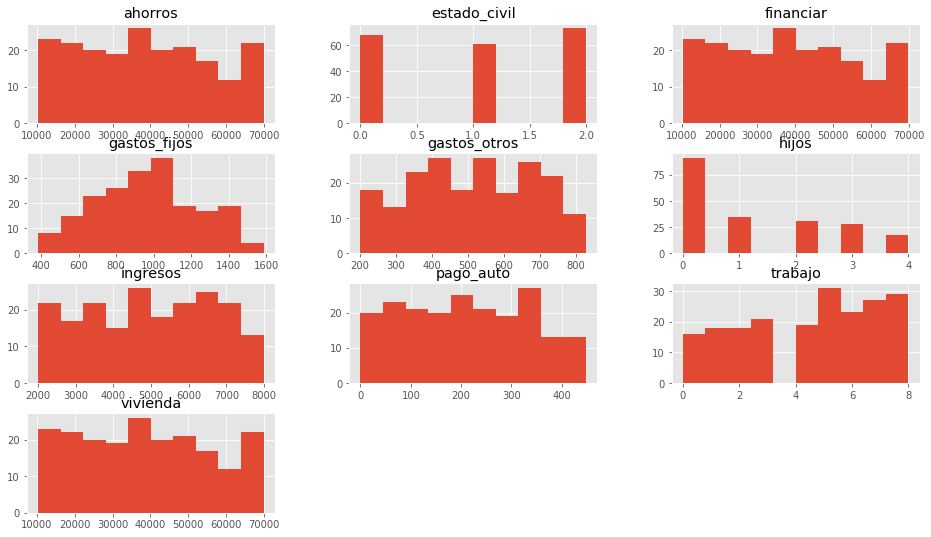

In [24]:
dataframe.drop(['comprar'], axis=1).hist()
plt.show()

### preprocesamos los datos

Se anexan 2 atributos nuevos. Uno de gastos el cual representa los gastos mensuales y el otro de financiar el cual representa el monto posible del credito

In [18]:
dataframe['financiar']=dataframe['vivienda']=dataframe['ahorros']
dataframe.drop(['gastos_fijos','gastos_otros','pago_auto'],axis=1).head(10)

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,financiar
0,6000,50000,50000,0,2,2,1,50000
1,6745,43240,43240,1,3,6,0,43240
2,6455,57463,57463,2,1,8,1,57463
3,7098,54506,54506,0,0,3,0,54506
4,6167,41512,41512,0,0,3,1,41512
5,5692,50875,50875,1,4,5,1,50875
6,6830,46761,46761,1,1,5,1,46761
7,6470,57439,57439,0,0,1,0,57439
8,6251,50503,50503,0,0,3,1,50503
9,6987,40611,40611,2,1,7,1,40611


### Estadistica descriptiva de los datos

In [20]:
reduced=dataframe.drop({'gastos_fijos','gastos_otros','pago_auto'},axis=1)
reduced.describe()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,financiar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,38749.668317,38749.668317,1.024752,1.232673,4.490099,0.331683,38749.668317
std,1682.862556,17365.231870,17365.231870,0.837184,1.367833,2.535794,0.471988,17365.231870
min,2008.000000,10319.000000,10319.000000,0.000000,0.000000,0.000000,0.000000,10319.000000
25%,3513.750000,24964.250000,24964.250000,0.000000,0.000000,2.000000,0.000000,24964.250000
50%,4947.500000,38523.000000,38523.000000,1.000000,1.000000,5.000000,0.000000,38523.000000
75%,6374.500000,52150.750000,52150.750000,2.000000,2.000000,7.000000,1.000000,52150.750000
max,7984.000000,69934.000000,69934.000000,2.000000,4.000000,8.000000,1.000000,69934.000000


### Seleccion de atributos caracteristicos de entrada (Feature Selection)

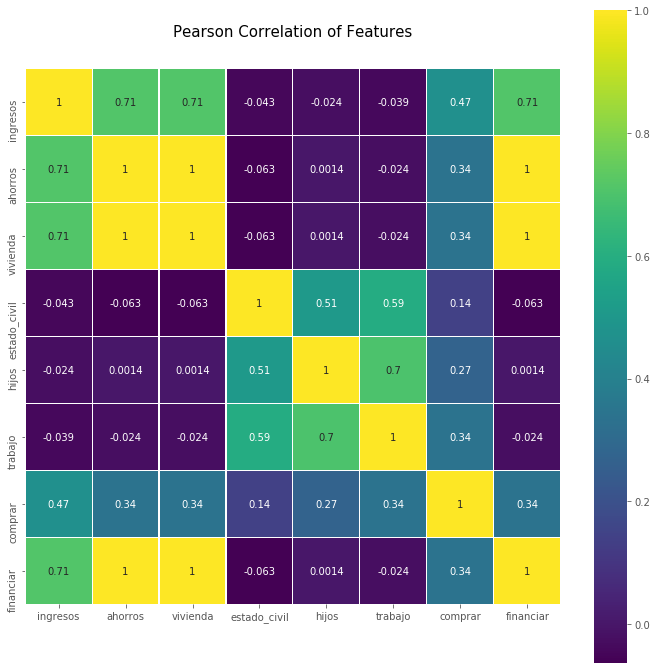

In [25]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(reduced.astype(float).corr(),linewidth=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)